## Data Plotting for 50 gr Experiment
### To be used for B&B  paper

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../../')
import utils
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("colorblind")

In [2]:
CALIBRATION_FILE = '../../../../calibration/out/C.mat'
# DATA_FILE = '../../../../experiment_data/blue_feet/bb_paper/50gr_step_responses/2017.04.09_12.15.22_trial_imudata.txt'
DATA_FILE = '../../../../experiment_data/blue_feet/bb_paper/20_gr_step_response/2017.04.13_15.08.26_trial_imudata.txt'

df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)

In [3]:
titles = {
    "AX": "Accelerations",
    "AY": "Accelerations",
    "AZ": "Accelerations",
    "A_mag": "Magnitude of Accelerations",
    "Fx": "Forces",
    "Fy": "Forces",
    "Fz": "Forces",
    "F_mag": "Magnitude of Forces",
    "Mx": "Moments",
    "My": "Moments",
    "Mz": "Moments",
    "M_mag": "Magnitude of Moments",
    "TorqueL": "Torques",
    "TorqueR": "Torques",
    "Right Leg Pos": "Leg Positions",
    "Left Leg Pos": "Leg Positions",
    "RBEMF": "Back EMF",
    "LBEMF": "Back EMF",
    "VMotorR": "VMotor",
    "VMotorL": "VMotor",
    "PowerR": "Power",
    "PowerL": "Power",
    "GyroX": "Gyro",
    "GyroY": "Gyro",
    "GyroZ": "Gyro",
    "Gyro_mag": "Speed of rotation",
    "Energy": "Energy",
    "VBatt": "VBatt",
    "AngleZ": "Anglez"
}

ylabels = {
    "AX": "Acceleration m/s^2",
    "AY": "Acceleration m/s^2",
    "AZ": "Acceleration m/s^2",
    "A_mag": "Acceleration m/s^2",
    "Fx": "Drag Force (N)",
    "Fy": "Force (N)",
    "Fz": "Lift Force (N)",
    "F_mag": "Force (N)",
    "Mx": "Moment (mN * m)",
    "My": "Moment (mN * m)",
    "Mz": "Moment (mN * m)",
    "M_mag": "Moment (mN * m)",
    "TorqueL": r'$\tau$ (mN * m)',
    "TorqueR": r'$\tau$ (mN * m)',
    "Right Leg Pos": "Leg position (rad)",
    "Left Leg Pos": "Leg position (rad)",
    "RBEMF": r'$\frac{kg * m^2}{A * s^2}$',
    "LBEMF": r'$\frac{kg * m^2}{A * s^2}$',
    "VMotorR": "VMotor",
    "VMotorL": "VMotor",
    "PowerR": "Power",
    "PowerL": "Power",
    "GyroX": "degrees/s",
    "GyroY": "degrees/s",
    "GyroZ": "degrees/s",
    "Gyro_mag": "degrees/s",
    "Energy": "Energy",
    "VBatt": "VBatt",
    "AngleZ": "Anglez"
}

In [4]:
def plot_columns(df,
                 columns,
                 output_dir="./out/",
                 output_filename="plots.png",
                 display=False,
                 save_figure=True,
                 figsize=None):
    """
    Columns - list of columns to plot with respect to time
    figsize - 2 item tuple containing (height, width) of tuple. For the
        notebooks, this is not necessary as figure.set_size_inches(...) will
        determine the line chart size. However, this is necessary while using
        the matplotlib gui interface.
    """
    xfont = {'fontname':'Times New Roman'}
    if figsize:
        figure, axarr = plt.subplots(len(columns), figsize=figsize)
    else:
        # Use the default figsize specified by rcparams.
        figure, axarr = plt.subplots(len(columns))

    for i in range(len(columns)):
        # If len(columns) > 1, then axarr is an array of axes.
        ax = axarr[i] if len(columns) > 1 else axarr

        if type(columns[i]) == list:
            for col in columns[i]:
                ax.plot(df["time"], df[col], label=col, linewidth=4)
                ax.set_ylabel(ylabels.get(col, col), fontdict=xfont, fontsize=40)

        else:
            ax.plot(df["time"], df[columns[i]], label=columns[i], linewidth=4)
            ax.set_ylabel(ylabels.get(columns[i], columns[i]), fontdict=xfont, fontsize=40)

        ax.set_xlim([0, df["time"].max()])
        ax.set_xlabel("Time (s)", fontdict=xfont, fontsize=40)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.), borderaxespad=0.,fontsize=40) ##
        ax.tick_params(axis='both', which='major', labelsize=40) ##

    # figure.set_size_inches(12, int(2 * len(columns)))
    figure.set_size_inches(12, 4)
    plt.tight_layout()

    if display:
        plt.show()

    if save_figure:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        print "Saving image as", output_dir + output_filename
        figure.savefig(output_dir + output_filename, dpi=450, bbox_inches='tight')
        print "Image saved."

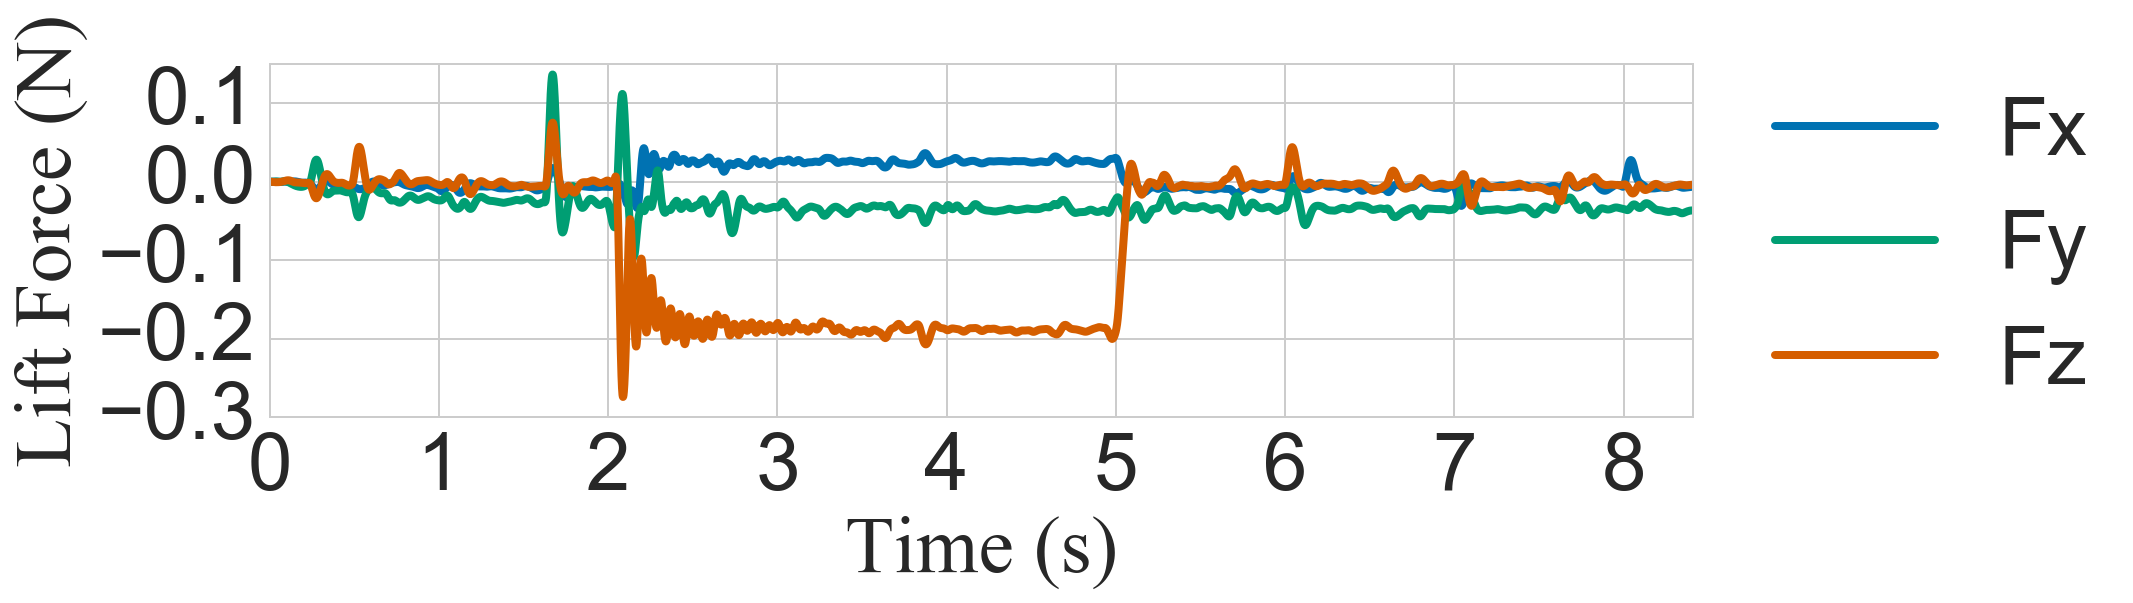

Saving image as ./out/20gr_forces.jpg
Image saved.


In [5]:
plot_columns(df,
            columns=[['Fx','Fy','Fz']],
            display=True,
            save_figure=True,
            output_dir='./out/',
            output_filename='20gr_forces.jpg',
            figsize=None)